{'bitcoin': {'usd': 65831}}
                   timestamp  bitcoin_price_usd
0 2024-09-28 01:46:08.863522              65831
Saved


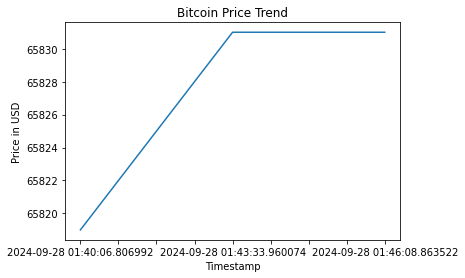

In [11]:
#import required packages
import requests
import pandas as pd
#loading data into sqlLite data base 
import sqlite3
import matplotlib.pyplot as plt

url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd'
#store as JSON
#get request to fetch data from the API
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Failed to retrieve ata:{response.status_code}")
# relevant informaiton to be extracted (Price of Bitcoin in USD)
bitcoin_price ={'timestamp': pd.to_datetime('now'),
               'bitcoin_price_usd': data['bitcoin']['usd']}#extract price

#converting data into dataframe using pd
df = pd.DataFrame([bitcoin_price])
print(df)
#connect to a SQLite database , creates one if doesnt exist
conn = sqlite3.connect('crypto_data.db')

#store data in a table called crypto_price
df.to_sql('crypto_prices', conn, if_exists='append', index=False)

#verify data is saved successsfully

print("Saved")


# Read the data from the SQLite database
df = pd.read_sql('SELECT * FROM crypto_prices', conn)

# Plot the Bitcoin price over time
df.set_index('timestamp')['bitcoin_price_usd'].plot()

# Add labels and title
plt.title('Bitcoin Price Trend')
plt.ylabel('Price in USD')
plt.xlabel('Timestamp')

# Display the plot
plt.show()


Saved


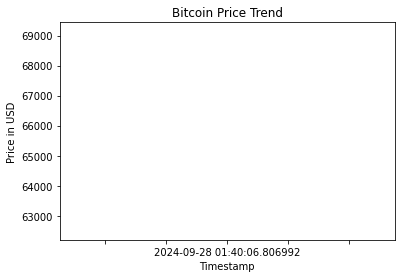

                   timestamp  bitcoin_price_usd
0 2024-09-28 01:43:33.960074              65831
Data successfully loaded into the database!


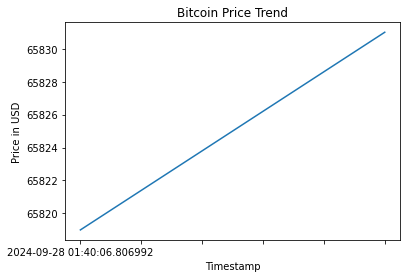